## Визуализация и анализ данных

### Загружаем подготовленный датасет

#### Импорт библиотек

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
PREPARED_DATASET_PATH = 'prepared_1.csv'
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.442751            6.0      7           9   
1          41      3  65.683640   40.049543            8.0      7           9   
2          53      2  44.947953   29.197612            0.0      8          12   
3          58      2  53.352981   34.352981            9.0      8          17   
4          99      1  39.649192   23.776169            7.0     11          12   

   HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  Social_3  \
0       1969   0.089040         B         B        33      7976         5   
1       1978   0.000070         B         B        46     10309         1   
2       1968   0.049637         B         B        34      7759         0   
3       1977   0.437885         B         B        23      5735         3   
4       1976   0.012339         B         B        35      5776         1   

   Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  StudioApartment  
0         900.0            0       11       B  184966.930730                0  
1         240.0            1       16       B  300009.450063                0  
2         229.0            1        3       B  220925.908524                1  
3        1084.0            0        5       B  175616.227217                0  
4        2078.0            2        4       B  150226.531644                0

In [5]:
matplotlib.rcParams.update({'font.size': 10})
plt.style.use('default')

### Анализ целевой переменной

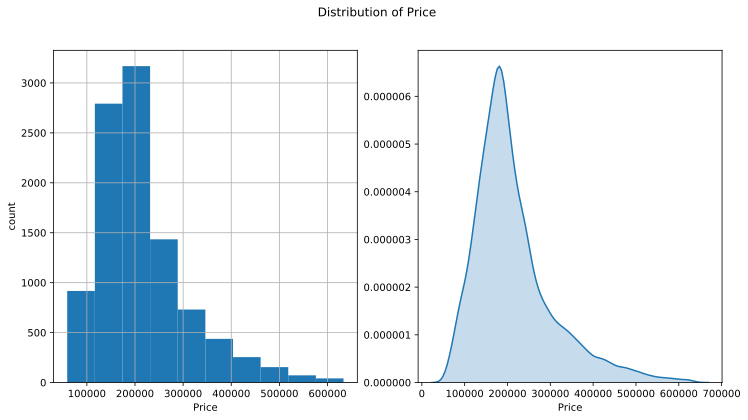

In [6]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
df['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [7]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()

target_mean, target_median

(214138.86, 192269.64487934904)

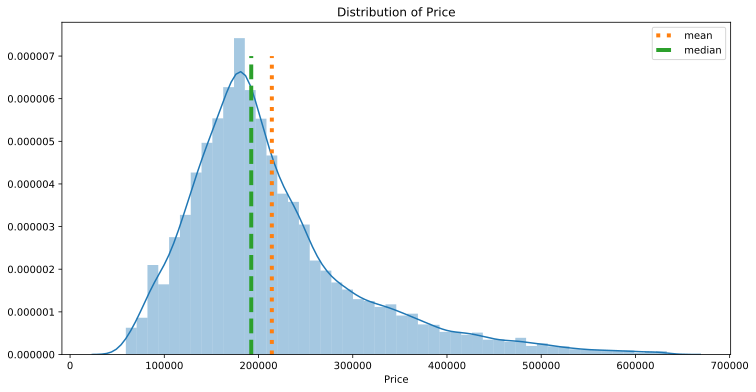

In [8]:
plt.figure(figsize = (12, 6))

sns.distplot(df['Price'])

y = np.linspace(0, 0.000007, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

### Оценка распредения целевой переменной в разрезе других признаков

#### Категориальные признаки

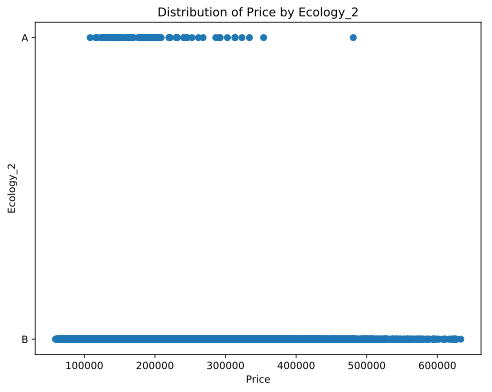

In [12]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Price'], df['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Distribution of Price by Ecology_2')
plt.show()

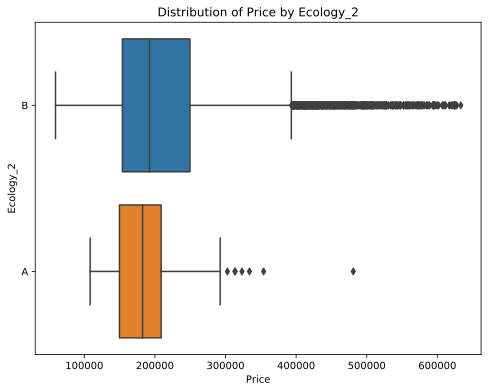

In [16]:
plt.figure(figsize=(8, 6))

sns.boxplot(df['Price'], df['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Distribution of Price by Ecology_2')
plt.show()

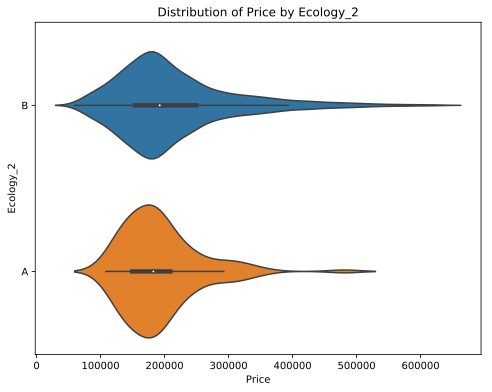

In [19]:
plt.figure(figsize=(8, 6))

sns.violinplot(df['Price'], df['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Distribution of Price by Ecology_2')
plt.show()

По графикам видно, что признак не играет существенной роли, но тем не менее медиана значений B немного более сдвинута в область высоких цен.

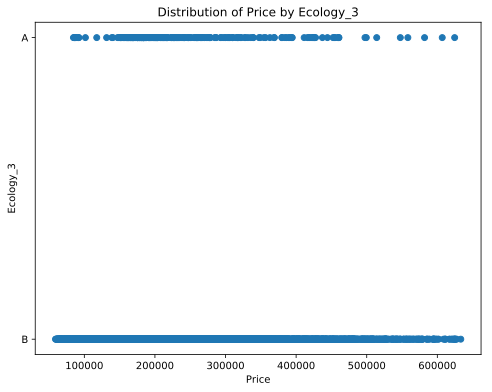

In [14]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Price'], df['Ecology_3'])

plt.xlabel('Price')
plt.ylabel('Ecology_3')
plt.title('Distribution of Price by Ecology_3')
plt.show()

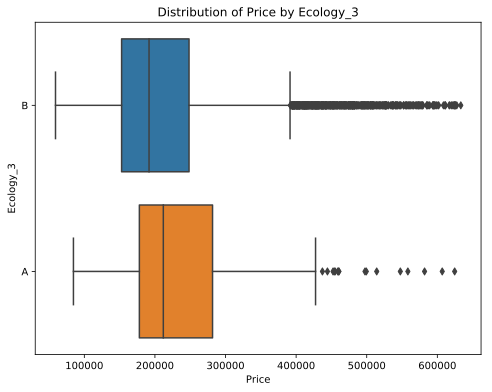

In [17]:
plt.figure(figsize=(8, 6))

sns.boxplot(df['Price'], df['Ecology_3'])

plt.xlabel('Price')
plt.ylabel('Ecology_3')
plt.title('Distribution of Price by Ecology_3')
plt.show()

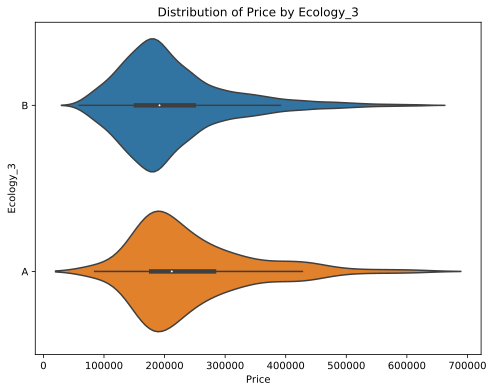

In [20]:
plt.figure(figsize=(8, 6))

sns.violinplot(df['Price'], df['Ecology_3'])

plt.xlabel('Price')
plt.ylabel('Ecology_3')
plt.title('Distribution of Price by Ecology_3')
plt.show()

По графикам видно, что признак не играет существенной роли, но тем не менее медиана значений A немного более сдвинута в область высоких цен.

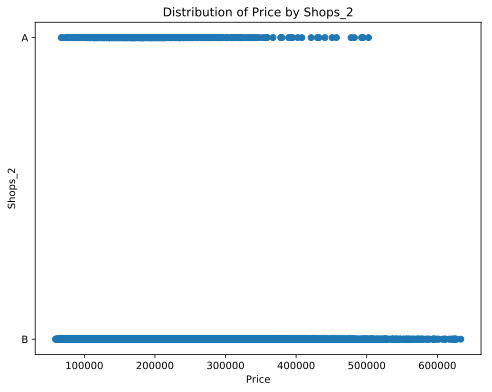

In [15]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Price'], df['Shops_2'])

plt.xlabel('Price')
plt.ylabel('Shops_2')
plt.title('Distribution of Price by Shops_2')
plt.show()

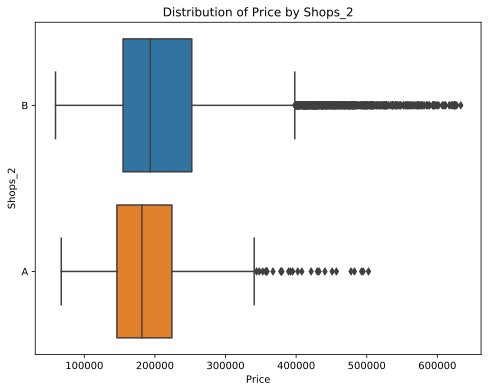

In [18]:
plt.figure(figsize=(8, 6))

sns.boxplot(df['Price'], df['Shops_2'])

plt.xlabel('Price')
plt.ylabel('Shops_2')
plt.title('Distribution of Price by Shops_2')
plt.show()

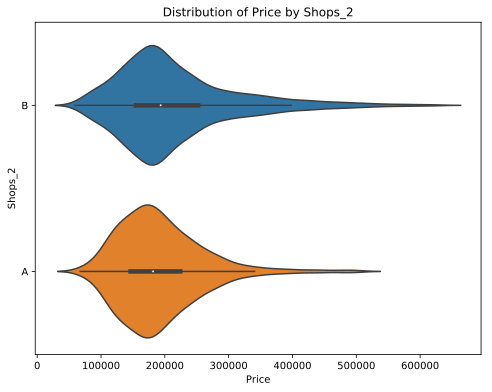

In [21]:
plt.figure(figsize=(8, 6))

sns.violinplot(df['Price'], df['Shops_2'])

plt.xlabel('Price')
plt.ylabel('Shops_2')
plt.title('Distribution of Price by Shops_2')
plt.show()

По графикам видно, что признак не играет существенной роли, но тем не менее медиана значений B немного более сдвинута в область высоких цен.

#### Преобразуем категориальные признаки Ecology_2, Ecology_3, Shops_2 в несколько бинарных

In [22]:
df = pd.get_dummies(df)
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.442751            6.0      7           9   
1          41      3  65.683640   40.049543            8.0      7           9   
2          53      2  44.947953   29.197612            0.0      8          12   
3          58      2  53.352981   34.352981            9.0      8          17   
4          99      1  39.649192   23.776169            7.0     11          12   

   HouseYear  Ecology_1  Social_1  ...  Helthcare_2  Shops_1          Price  \
0       1969   0.089040        33  ...            0       11  184966.930730   
1       1978   0.000070        46  ...            1       16  300009.450063   
2       1968   0.049637        34  ...            1        3  220925.908524   
3       1977   0.437885        23  ...            0        5  175616.227217   
4       1976   0.012339        35  ...            2        4  150226.531644   

   StudioApartment  Ecology_2_A  Ecology_2_B  Ecology_3_A  Ecology_3_B  \
0                0            0            1            0            1   
1                0            0            1            0            1   
2                1            0            1            0            1   
3                0            0            1            0            1   
4                0            0            1            0            1   

   Shops_2_A  Shops_2_B  
0          0          1  
1          0          1  
2          0          1  
3          0          1  
4          0          1  

[5 rows x 23 columns]

#### Удаляем лишние колонки т.к. у этих бинарных признаков всего 2 возможных значения

In [24]:
df.drop(['Ecology_2_B', 'Ecology_3_B', 'Shops_2_B'], axis='columns', inplace=True)
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.442751            6.0      7           9   
1          41      3  65.683640   40.049543            8.0      7           9   
2          53      2  44.947953   29.197612            0.0      8          12   
3          58      2  53.352981   34.352981            9.0      8          17   
4          99      1  39.649192   23.776169            7.0     11          12   

   HouseYear  Ecology_1  Social_1  Social_2  Social_3  Healthcare_1  \
0       1969   0.089040        33      7976         5         900.0   
1       1978   0.000070        46     10309         1         240.0   
2       1968   0.049637        34      7759         0         229.0   
3       1977   0.437885        23      5735         3        1084.0   
4       1976   0.012339        35      5776         1        2078.0   

   Helthcare_2  Shops_1          Price  StudioApartment  Ecology_2_A  \
0            0       11  184966.930730                0            0   
1            1       16  300009.450063                0            0   
2            1        3  220925.908524                1            0   
3            0        5  175616.227217                0            0   
4            2        4  150226.531644                0            0   

   Ecology_3_A  Shops_2_A  
0            0          0  
1            0          0  
2            0          0  
3            0          0  
4            0          0

#### Сохраняем подготовленный датасет

In [29]:
PREPARED_DATASET2_PATH = 'prepared2.csv'
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

#### Загружаем подготовленный датасет

In [30]:
df = pd.read_csv(PREPARED_DATASET2_PATH)
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35      2  47.981561   29.442751            6.0      7           9   
1          41      3  65.683640   40.049543            8.0      7           9   
2          53      2  44.947953   29.197612            0.0      8          12   
3          58      2  53.352981   34.352981            9.0      8          17   
4          99      1  39.649192   23.776169            7.0     11          12   

   HouseYear  Ecology_1  Social_1  Social_2  Social_3  Healthcare_1  \
0       1969   0.089040        33      7976         5         900.0   
1       1978   0.000070        46     10309         1         240.0   
2       1968   0.049637        34      7759         0         229.0   
3       1977   0.437885        23      5735         3        1084.0   
4       1976   0.012339        35      5776         1        2078.0   

   Helthcare_2  Shops_1          Price  StudioApartment  Ecology_2_A  \
0            0       11  184966.930730                0            0   
1            1       16  300009.450063                0            0   
2            1        3  220925.908524                1            0   
3            0        5  175616.227217                0            0   
4            2        4  150226.531644                0            0   

   Ecology_3_A  Shops_2_A  
0            0          0  
1            0          0  
2            0          0  
3            0          0  
4            0          0

#### Анализ количественных признаков

In [32]:
df.dtypes

DistrictId           int64
Rooms                int64
Square             float64
LifeSquare         float64
KitchenSquare      float64
Floor                int64
HouseFloor           int64
HouseYear            int64
Ecology_1          float64
Social_1             int64
Social_2             int64
Social_3             int64
Healthcare_1       float64
Helthcare_2          int64
Shops_1              int64
Price              float64
StudioApartment      int64
Ecology_2_A          int64
Ecology_3_A          int64
Shops_2_A            int64
dtype: object

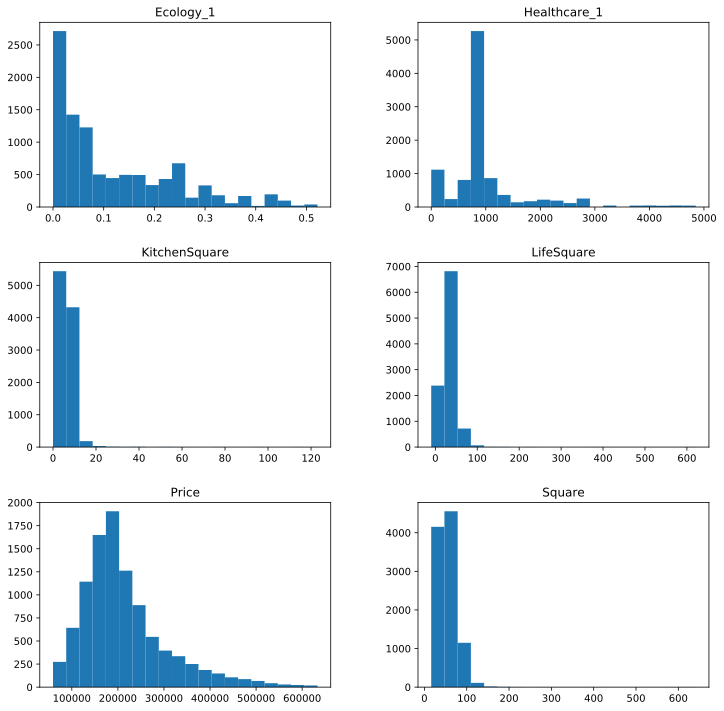

In [33]:
df_num_features = df.select_dtypes(include='float64')
df_num_features.hist(figsize=(12,12), bins=20, grid=False);

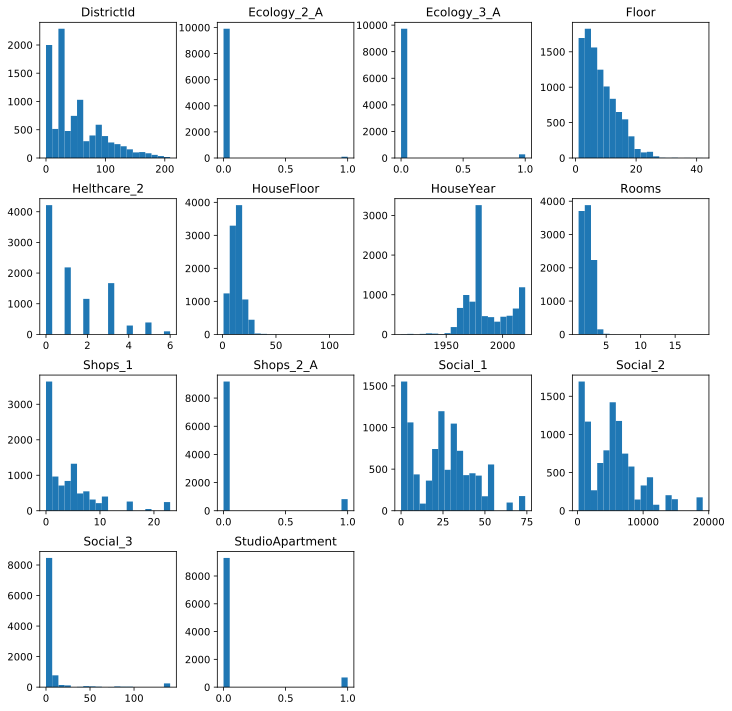

In [34]:
df_int_num_features = df.select_dtypes(include='int64')
df_int_num_features.hist(figsize=(12,12), bins=20, grid=False);

#### Бинарные признаки

In [35]:
df_bin_features = df_int_num_features.copy()
df_bin_features.drop(['DistrictId', 'Floor', 'Helthcare_2','HouseFloor','HouseYear','Rooms','Shops_1','Social_1','Social_2','Social_3'], axis='columns', inplace=True)
df_bin_features.dtypes

StudioApartment    int64
Ecology_2_A        int64
Ecology_3_A        int64
Shops_2_A          int64
dtype: object

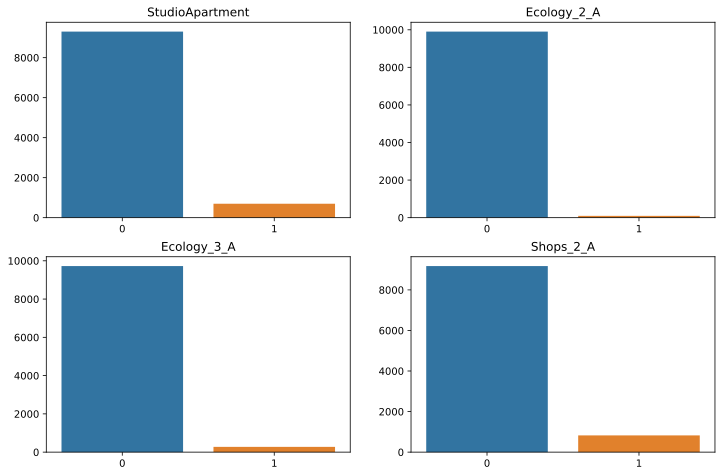

In [36]:
plt.figure(figsize = (12,12))

for i, colname in enumerate(df_bin_features.columns):
    counts = df_bin_features[colname].value_counts()
    
    plt.subplot(3,2,i+1)    
    plt.title(colname)
    sns.barplot(counts.index, counts.values)
    
plt.show()

### Матрица корелляций

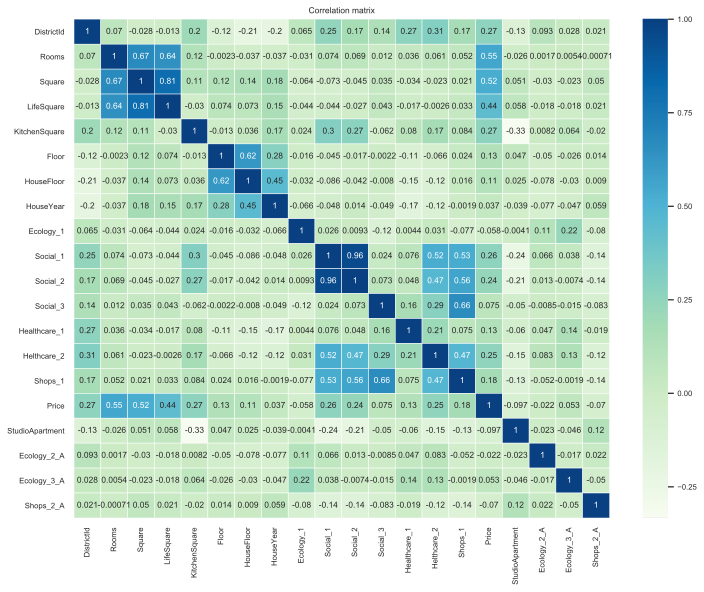

In [39]:
plt.figure(figsize = (12,9))

sns.set(font_scale=0.7)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.savefig('Correlation matrix_.png')
plt.show()